In [17]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
import pymoc
import glob
from time import sleep
import os


import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
import pyvo as vo
import glob

import copy

In [3]:
def read_fits(filename):
    hdulist = fits.open(filename)
    data = hdulist[1].data
    hdulist.close()
    return(data)

In [4]:
file_list = glob.glob('data/fir_v2/*/*')
file_array = np.array(file_list)

In [11]:
len(data_no_rerun)

977

In [22]:
data_no_rerun = []
for i,file in enumerate(file_list):
    if 'rerun' in file:
        continue
    if i%100==0:
        print(i)
    with fits.open(file,memmap=False) as hdul:
        for n,hdu in enumerate(hdul):
            if n==1:
                data = hdu.data
                data_no_rerun.append(copy.deepcopy(data))
                del data
                del hdu

0
100
300
600
700
800
900
1100
1200
1300
1400
1500
1700
1900
2100
2200
2300
2400
2500
2600
2700
2800
2900
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4600
4700
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6700
6800
6900
7000
7100
7200
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8700
8900
9000
9100
9200
9300
9400
9500
9700
9800
9900
10000
10100
10300
10400
10500
10600
10700
10800
10900
11000
11200
11300
11400
11500
11600
11700
11800
11900
12100
12200
12300
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13600
13900
14000
14100
14200
14300
14500
14600
14800
15000
15100
15200
15400
15500
15600
15700
15900
16000
16100
16200
16400
16500
16600
16700
16900
17100
17200
17300
17400
17600
17700
17900
18000
18100
18200
18300
18500
18600
18800
18900
19000
19100
19200
19300
19500
19600
19700
19800
20200
20300
20500
20600
20700
20800
20900
21200
21500
21600
21700
21800
21900
22000
22300
22400
22600
22700
22800
2

In [ ]:
#data_no_rerun = [read_fits(file) for i,file in enumerate(file_list) if 'rerun' not in file]

In [23]:
colnames = Table.read('data/fir_v2/xidplus_run_4/lofar_xidplus_fir_4.fits').colnames

In [24]:
colnames

['Source_id',
 'Isl_id',
 'RA',
 'E_RA',
 'DEC',
 'E_DEC',
 'Total_flux',
 'E_Total_flux',
 'Peak_flux',
 'E_Peak_flux',
 'RA_max',
 'E_RA_max',
 'DEC_max',
 'E_DEC_max',
 'Maj',
 'E_Maj',
 'Min',
 'E_Min',
 'PA',
 'E_PA',
 'Maj_img_plane',
 'E_Maj_img_plane',
 'Min_img_plane',
 'E_Min_img_plane',
 'PA_img_plane',
 'E_PA_img_plane',
 'DC_Maj',
 'E_DC_Maj',
 'DC_Min',
 'E_DC_Min',
 'DC_PA',
 'E_DC_PA',
 'DC_Maj_img_plane',
 'E_DC_Maj_img_plane',
 'DC_Min_img_plane',
 'E_DC_Min_img_plane',
 'DC_PA_img_plane',
 'E_DC_PA_img_plane',
 'Isl_Total_flux',
 'E_Isl_Total_flux',
 'Isl_rms',
 'Isl_mean',
 'Resid_Isl_rms',
 'Resid_Isl_mean',
 'S_Code',
 'FLAG_OVERLAP_1',
 'lr_fin',
 'lr_dist_fin',
 'lr_index_fin',
 'fworkflow_all',
 'FLAG_WORKFLOW',
 'NUMBER',
 'SNR_WIN',
 'BACKGROUND',
 'THRESHOLD',
 'X_IMAGE',
 'Y_IMAGE',
 'ra_1',
 'dec_1',
 'X2_IMAGE',
 'Y2_IMAGE',
 'XY_IMAGE',
 'X2_WORLD',
 'Y2_WORLD',
 'A_IMAGE',
 'B_IMAGE',
 'THETA_IMAGE',
 'ERRA_IMAGE',
 'ERRB_IMAGE',
 'ERRTHETA_IMAGE',
 'FL

In [25]:
colnames_use = ['Source_id',
 'Isl_id',
 'RA_1',
 'E_RA',
 'DEC',
 'E_DEC',
 'ra_2',
 'dec_2',
 'f_spire_250',
 'ferr_spire_250',
 'flag_spire_250',
 'f_spire_350',
 'ferr_spire_350',
 'flag_spire_350',
 'f_spire_500',
 'ferr_spire_500',
 'flag_spire_500',
 'flag_optnir_det',
 'f_mips_24',
 'XID_rerun',
 'source_type']

In [26]:
data_no_rerun_list = [data_no_rerun[i][name] for name in colnames_use for i in range(len(data_no_rerun))] 

In [27]:
data_no_rerun_table_use = np.array(data_no_rerun_list).reshape(int(len(data_no_rerun_list)/len(data_no_rerun)),len(data_no_rerun))
data_no_rerun_table_use = [data_no_rerun_table_use[i] for i in range(len(data_no_rerun_table_use))]

In [28]:
data_no_rerun_table = Table(data=data_no_rerun_table_use,names=colnames_use)

In [29]:
mask = data_no_rerun_table['flag_spire_250'] == 'True'
data_no_rerun_table['flag_spire_250'][mask] = 1
data_no_rerun_table['flag_spire_250'][~mask] = 0
mask = data_no_rerun_table['flag_spire_350'] == 'True'
data_no_rerun_table['flag_spire_350'][mask] = 1
data_no_rerun_table['flag_spire_350'][~mask] = 0
mask = data_no_rerun_table['flag_spire_500'] == 'True'
data_no_rerun_table['flag_spire_500'][mask] = 1
data_no_rerun_table['flag_spire_500'][~mask] = 0

In [30]:
for name in colnames_use:
    print(name)
    if 'id' in name:
        data_no_rerun_table[name] = data_no_rerun_table[name].astype(int)
        continue
        
    if 'optnir' in name:
        data_no_rerun_table[name] = data_no_rerun_table[name].astype(int)
        continue
        
    if'flag' in name:
        data_no_rerun_table[name] = data_no_rerun_table[name].astype(bool)
        continue

    if 'rerun'in name:
        continue
    if 'type' in name:
        continue
    data_no_rerun_table[name] = data_no_rerun_table[name].astype(float)

Source_id
Isl_id
RA_1
E_RA
DEC
E_DEC
ra_2
dec_2
f_spire_250
ferr_spire_250
flag_spire_250
f_spire_350
ferr_spire_350
flag_spire_350
f_spire_500
ferr_spire_500
flag_spire_500
flag_optnir_det
f_mips_24
XID_rerun
source_type


In [31]:
data_no_rerun_table.rename_column('RA_1','RA_radio')
data_no_rerun_table.rename_column('DEC','DEC_radio')
data_no_rerun_table.rename_column('ra_2','RA_optical')
data_no_rerun_table.rename_column('dec_2','DEC_optical')

In [32]:
data_no_rerun_table[:5]

Source_id,Isl_id,RA_radio,E_RA,DEC_radio,E_DEC,RA_optical,DEC_optical,f_spire_250,ferr_spire_250,flag_spire_250,f_spire_350,ferr_spire_350,flag_spire_350,f_spire_500,ferr_spire_500,flag_spire_500,flag_optnir_det,f_mips_24,XID_rerun,source_type
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,float64,float64,bool,int64,float64,str32,str32
11188,11221,245.56578560168245,0.0002471000402460799,54.917808438453065,0.00015312112180382957,245.56576090298938,54.91902658232867,11019.371,3092.141599999999,False,21895.573,3110.4029999999984,False,25246.68,1562.828999999998,False,6,59.862274,False,nearest_prior
11202,11235,245.55483895031202,6.270472852990592e-05,54.789896398364675,7.199854063865182e-05,245.55486235239024,54.79001147528079,30274.975000000002,3193.3849999999984,False,29705.154,4812.888999999999,False,26555.77,6240.956000000002,False,6,565.82947,False,nearest_prior
11154,11187,245.57614522759943,0.00024286511052720277,54.9622791035095,8.600107292059286e-05,245.5760261331011,54.96229947940713,5889.168299999999,2841.824700000001,False,6727.674,2850.8250000000016,False,4596.262000000001,3435.996,False,6,111.98047,False,nearest_prior
11315,11348,245.56004178965807,0.00012082939411326408,55.11191624362935,5.771946443312041e-05,245.56007702405702,55.1128389434993,66076.36,12254.303999999996,True,23747.787,13287.552,True,10736.1,9404.884,False,7,1744.0573,False,nearest_prior
11264,11297,245.5443103895625,8.502838465312147e-05,54.77578769888053,8.329357661041251e-05,245.544328090057,54.7759088114993,22578.224,3092.274999999998,False,6551.7716,4251.2374,False,9051.606,7043.939000000002,False,7,487.0581,False,nearest_prior


In [33]:
data_rerun = []
for i,file in enumerate(file_list):
    if 'rerun' not in file:
        continue
    if i%500==0:
        print(i)
    with fits.open(file,memmap=False) as hdul:
        for n,hdu in enumerate(hdul):
            if n==1:
                data = hdu.data
                data_rerun.append(copy.deepcopy(data))
                del data
                del hdu

500
1000
2000
3000
4500
8500
12000
13500
17000
17500
20000
21000
22500
28500
29000
29500
30500


In [ ]:
data_rerun = [fits.open(file)[1].data for i,file in enumerate(file_list[:30]) if 'rerun' in file]

In [34]:
colnames = Table.read('data/fir_v2/xidplus_run_5/lofar_xidplus_fir_5_rerun.fits').colnames

In [35]:
colnames

['Source_id',
 'Isl_id',
 'RA_1',
 'E_RA',
 'DEC',
 'E_DEC',
 'Total_flux',
 'E_Total_flux',
 'Peak_flux',
 'E_Peak_flux',
 'RA_max',
 'E_RA_max',
 'DEC_max',
 'E_DEC_max',
 'Maj',
 'E_Maj',
 'Min',
 'E_Min',
 'PA',
 'E_PA',
 'Maj_img_plane',
 'E_Maj_img_plane',
 'Min_img_plane',
 'E_Min_img_plane',
 'PA_img_plane',
 'E_PA_img_plane',
 'DC_Maj',
 'E_DC_Maj',
 'DC_Min',
 'E_DC_Min',
 'DC_PA',
 'E_DC_PA',
 'DC_Maj_img_plane',
 'E_DC_Maj_img_plane',
 'DC_Min_img_plane',
 'E_DC_Min_img_plane',
 'DC_PA_img_plane',
 'E_DC_PA_img_plane',
 'Isl_Total_flux',
 'E_Isl_Total_flux',
 'Isl_rms',
 'Isl_mean',
 'Resid_Isl_rms',
 'Resid_Isl_mean',
 'S_Code',
 'FLAG_OVERLAP_1',
 'lr_fin',
 'lr_dist_fin',
 'lr_index_fin',
 'fworkflow_all',
 'FLAG_WORKFLOW',
 'NUMBER',
 'SNR_WIN',
 'BACKGROUND',
 'THRESHOLD',
 'X_IMAGE',
 'Y_IMAGE',
 'ra',
 'dec',
 'X2_IMAGE',
 'Y2_IMAGE',
 'XY_IMAGE',
 'X2_WORLD',
 'Y2_WORLD',
 'A_IMAGE',
 'B_IMAGE',
 'THETA_IMAGE',
 'ERRA_IMAGE',
 'ERRB_IMAGE',
 'ERRTHETA_IMAGE',
 'FLAG

In [36]:
colnames_use = ['Source_id',
 'Isl_id',
 'RA_1',
 'E_RA',
 'DEC',
 'E_DEC',
 'RA_2',
 'Dec',
 'F_SPIRE_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'F_SPIRE_350',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'F_SPIRE_500',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'Bkg_SPIRE_250',
 'Bkg_SPIRE_350',
 'Bkg_SPIRE_500',
 'Sig_conf_SPIRE_250',
 'Sig_conf_SPIRE_350',
 'Sig_conf_SPIRE_500',
 'Rhat_SPIRE_250',
 'Rhat_SPIRE_350',
 'Rhat_SPIRE_500',
 'n_eff_SPIRE_250',
 'n_eff_SPIRE_500',
 'n_eff_SPIRE_350',
 'Pval_res_250',
 'Pval_res_350',
 'Pval_res_500',
 'f_mips_24',
 'flag_optnir_det',
 'XID_rerun',
 'source_type']

In [37]:
data_rerun_list = [data_rerun[i][name] for name in colnames_use for i in range(len(data_rerun))] 
    

In [38]:
data_table_use = np.array(data_rerun_list).reshape(int(len(data_rerun_list)/len(data_rerun)),len(data_rerun))
data_table_use = [data_table_use[i] for i in range(len(data_table_use))]

In [39]:
data_rerun_table = Table(data=data_table_use,names=colnames_use)

In [40]:
for name in colnames_use:
    print(name)
    if 'id' in name:
        data_rerun_table[name] = data_rerun_table[name].astype(int)
        continue
        
    if 'optnir' in name:
        data_rerun_table[name] = data_rerun_table[name].astype(int)
        continue

    if 'rerun'in name:
        continue
    if 'type' in name:
        continue
    data_rerun_table[name] = data_rerun_table[name].astype(float)

Source_id
Isl_id
RA_1
E_RA
DEC
E_DEC
RA_2
Dec
F_SPIRE_250
FErr_SPIRE_250_u
FErr_SPIRE_250_l
F_SPIRE_350
FErr_SPIRE_350_u
FErr_SPIRE_350_l
F_SPIRE_500
FErr_SPIRE_500_u
FErr_SPIRE_500_l
Bkg_SPIRE_250
Bkg_SPIRE_350
Bkg_SPIRE_500
Sig_conf_SPIRE_250
Sig_conf_SPIRE_350
Sig_conf_SPIRE_500
Rhat_SPIRE_250
Rhat_SPIRE_350
Rhat_SPIRE_500
n_eff_SPIRE_250
n_eff_SPIRE_500
n_eff_SPIRE_350
Pval_res_250
Pval_res_350
Pval_res_500
f_mips_24
flag_optnir_det
XID_rerun
source_type


In [41]:
data_rerun_table

Source_id,Isl_id,RA_1,E_RA,DEC,E_DEC,RA_2,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,f_mips_24,flag_optnir_det,XID_rerun,source_type
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str32,str32
11224,11257,245.5559630403818,6.928490018141783e-05,54.83834134143999,5.0607703534065964e-05,245.55610794128722,54.838303889799754,20.693974,27.159615,14.258348,11.792829,17.485456,7.2701745,14.398449,21.330835,7.5536075,-1.5180995,-0.20048411,-5.921184,0.88522494,1.1417224,2.5373552,0.9993967,1.0000571,0.99966073,2169.6765,1633.6724,1581.9532,0.438,0.592,0.144,nan,-99,True,radio_position
11198,11231,245.5596019712882,7.898312193953011e-05,54.84066488324045,7.651126269418831e-05,245.55629702388072,54.841769094171426,1.4719188,2.9334407,0.46737105,11.01365,15.898376,6.219555,9.1886,15.457335,3.602747,-1.3638785,0.5197205,-2.461065,0.8724072,0.5182884,0.9181343,0.9991941,1.0002882,1.0006609,1628.0112,2436.0837,1452.2313,0.309,0.0,0.015,nan,-99,True,radio_position
11265,11298,245.5493012866434,0.00011728035148045549,54.836503065569424,0.0001037608451451578,245.5494751354847,54.836433441728175,13.213366,17.171213,9.604163,11.955302,16.251053,7.9203725,13.979537,19.999344,7.8531733,-1.4197111,0.04152146,-4.6580715,0.64217234,1.0408654,2.650398,1.0002866,1.0013806,1.00372,1996.1713,1751.2853,1526.8484,0.641,0.023,0.372,nan,-99,True,radio_position
11286,11319,245.54511944512188,6.90146749122392e-05,54.82762978394664,6.562730640708312e-05,245.54377726052704,54.82715644449796,1.5865195,2.8434021,0.53685385,1.2310833,2.5068724,0.3923137,3.228951,5.9211507,1.1729431,-0.8147872,0.11661218,-3.729072,0.72947156,1.0475833,1.627341,0.9991644,0.9997183,1.0003014,1786.9082,2137.3076,2075.2993,0.0,0.219,0.65,nan,-99,True,radio_position
11596,11629,245.4876157766043,6.226869572432241e-05,54.658492186661256,5.452719844160593e-05,245.4878737857972,54.65855064201202,0.35265186,0.72713894,0.095026486,1.0649952,1.7874278,0.42383745,1.5547217,3.3745036,0.41438165,-0.3683896,-2.5135596,-6.120653,0.5679609,0.34453717,1.7725224,1.00435,1.0005562,0.9995423,1554.882,1834.7651,1700.5844,0.781,0.003,0.828,nan,-99,True,radio_position
11473,11506,245.5355181638513,0.00017080560409688062,55.08549782016615,0.0001473555482603892,245.53558442002497,55.085576732531315,0.92497253,1.7089804,0.34054637,1.2945278,2.2487152,0.5441945,2.2979221,4.420825,0.7594253,-0.5656717,-1.9350106,-5.149839,0.44375378,0.4240901,1.250255,1.0001646,0.9998913,1.0002185,1198.8915,1537.7306,1743.0653,0.002,0.247,0.585,nan,-99,True,radio_position
11341,11374,245.5365951579903,9.994361605403449e-05,54.81547866115369,8.780740140584932e-05,245.53650378694587,54.81536047623321,2.4352324,3.961249,1.0667526,3.2829382,6.13979,1.1432554,1.3585665,3.2934244,0.34029666,-0.8863802,-1.1903856,-7.5260925,0.7067242,1.2745267,2.011369,0.999335,0.9997241,0.9987888,1997.7604,2723.0884,2297.4094,0.872,0.538,0.784,nan,-99,True,radio_position
11343,11376,245.54922036652505,0.00010940297734946967,54.9844643052484,0.00016381983509109328,245.54950876681855,54.984329597137716,0.8057338,1.8217089,0.20963113,3.0215137,6.445292,0.8275053,2.5749624,5.9973707,0.6772676,-1.789814,-2.357422,-9.809928,0.7735617,1.4618478,2.422008,0.9998594,0.9986078,0.9986995,2305.8064,2905.463,2597.378,0.928,0.816,0.994,nan,-99,True,radio_position
11319,11352,245.5364747486107,3.4856913997847296e-05,54.77732033795525,3.475489273854298e-05,245.53640508657605,54.77736020347609,0.12873164,0.32434216,0.035165925,0.

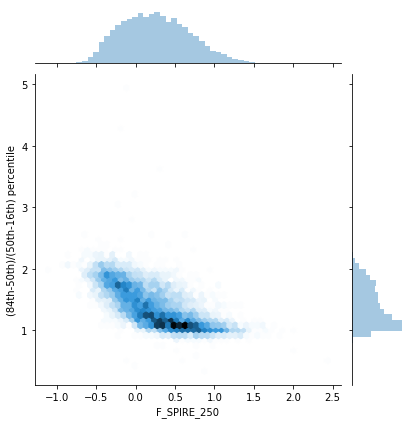

In [42]:
skew=(data_rerun_table['FErr_SPIRE_250_u']-data_rerun_table['F_SPIRE_250'])/(data_rerun_table['F_SPIRE_250']-data_rerun_table['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(data_rerun_table['F_SPIRE_250']),y=skew, kind='hex')


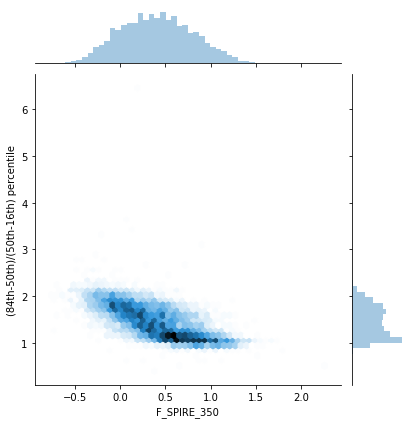

In [43]:
skew=(data_rerun_table['FErr_SPIRE_350_u']-data_rerun_table['F_SPIRE_350'])/(data_rerun_table['F_SPIRE_350']-data_rerun_table['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(data_rerun_table['F_SPIRE_350']),y=skew, kind='hex')

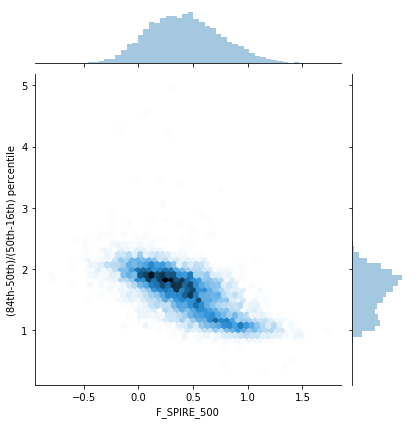

In [44]:
skew=(data_rerun_table['FErr_SPIRE_500_u']-data_rerun_table['F_SPIRE_500'])/(data_rerun_table['F_SPIRE_500']-data_rerun_table['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(data_rerun_table['F_SPIRE_500']),y=skew, kind='hex')

In [45]:
data_rerun_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_spire_250'))
data_rerun_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_spire_350'))
data_rerun_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_spire_500'))

In [46]:
ind_SERVS_250=(data_rerun_table['Pval_res_250']>0.5) | (data_rerun_table['F_SPIRE_250'] < 3)
ind_SERVS_350=(data_rerun_table['Pval_res_350']>0.5) | (data_rerun_table['F_SPIRE_350'] < 4)
ind_SERVS_500=(data_rerun_table['Pval_res_500']>0.5) | (data_rerun_table['F_SPIRE_500'] < 6)

print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(data_rerun_table))

data_rerun_table['flag_spire_250'][ind_SERVS_250]=True
data_rerun_table['flag_spire_350'][ind_SERVS_350]=True
data_rerun_table['flag_spire_500'][ind_SERVS_500]=True

5664 6051 6542 6769


In [47]:
data_rerun_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=float),name='ferr_spire_250'))
data_rerun_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=float),name='ferr_spire_350'))
data_rerun_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=float),name='ferr_spire_500'))

In [48]:
ferr_250 = (data_rerun_table['FErr_SPIRE_250_u'] - data_rerun_table['FErr_SPIRE_250_l'])/2 
ferr_350 = (data_rerun_table['FErr_SPIRE_350_u'] - data_rerun_table['FErr_SPIRE_350_l'])/2 
ferr_500 = (data_rerun_table['FErr_SPIRE_500_u'] - data_rerun_table['FErr_SPIRE_500_l'])/2 

In [49]:
data_rerun_table['ferr_spire_250'] = ferr_250
data_rerun_table['ferr_spire_350'] = ferr_350
data_rerun_table['ferr_spire_500'] = ferr_500

In [50]:
data_rerun_table.rename_column('RA_1','RA_radio')
data_rerun_table.rename_column('DEC','DEC_radio')
data_rerun_table.rename_column('RA_2','RA_optical')
data_rerun_table.rename_column('Dec','DEC_optical')
data_rerun_table.rename_column('F_SPIRE_250','f_spire_250')
data_rerun_table.rename_column('F_SPIRE_350','f_spire_350')
data_rerun_table.rename_column('F_SPIRE_500','f_spire_500')

In [51]:
data_rerun_table.colnames

['Source_id',
 'Isl_id',
 'RA_radio',
 'E_RA',
 'DEC_radio',
 'E_DEC',
 'RA_optical',
 'DEC_optical',
 'f_spire_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'f_spire_350',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'f_spire_500',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'Bkg_SPIRE_250',
 'Bkg_SPIRE_350',
 'Bkg_SPIRE_500',
 'Sig_conf_SPIRE_250',
 'Sig_conf_SPIRE_350',
 'Sig_conf_SPIRE_500',
 'Rhat_SPIRE_250',
 'Rhat_SPIRE_350',
 'Rhat_SPIRE_500',
 'n_eff_SPIRE_250',
 'n_eff_SPIRE_500',
 'n_eff_SPIRE_350',
 'Pval_res_250',
 'Pval_res_350',
 'Pval_res_500',
 'f_mips_24',
 'flag_optnir_det',
 'XID_rerun',
 'source_type',
 'flag_spire_250',
 'flag_spire_350',
 'flag_spire_500',
 'ferr_spire_250',
 'ferr_spire_350',
 'ferr_spire_500']

In [52]:
colnames_keep = ['Source_id',
 'Isl_id',
 'RA_radio',
 'E_RA',
 'DEC_radio',
 'E_DEC',
 'RA_optical',
 'DEC_optical',
 'f_spire_250',
 'ferr_spire_250',
 'flag_spire_250',
 'f_spire_350',
 'ferr_spire_350',
 'flag_spire_350',
 'f_spire_500',
 'ferr_spire_500',
 'flag_spire_500',
 'f_mips_24',
 'flag_optnir_det',
 'XID_rerun',
 'source_type']
data_rerun_final_table = data_rerun_table[colnames_keep]

In [53]:
data_rerun_final_table[:5]

Source_id,Isl_id,RA_radio,E_RA,DEC_radio,E_DEC,RA_optical,DEC_optical,f_spire_250,ferr_spire_250,flag_spire_250,f_spire_350,ferr_spire_350,flag_spire_350,f_spire_500,ferr_spire_500,flag_spire_500,f_mips_24,flag_optnir_det,XID_rerun,source_type
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,int64,str32,str32
11224,11257,245.5559630403818,6.928490018141783e-05,54.83834134143999,5.0607703534065964e-05,245.55610794128722,54.838303889799754,20.693974,6.4506334999999995,False,11.792829,5.10764075,True,14.398449,6.88861375,False,nan,-99,True,radio_position
11198,11231,245.5596019712882,7.898312193953011e-05,54.84066488324045,7.651126269418831e-05,245.55629702388072,54.841769094171426,1.4719188,1.2330348249999998,True,11.01365,4.8394105000000005,False,9.1886,5.927294,False,nan,-99,True,radio_position
11265,11298,245.5493012866434,0.00011728035148045549,54.836503065569424,0.0001037608451451578,245.5494751354847,54.836433441728175,13.213366,3.783525000000001,True,11.955302,4.16534025,False,13.979537,6.07308535,False,nan,-99,True,radio_position
11286,11319,245.54511944512188,6.90146749122392e-05,54.82762978394664,6.562730640708312e-05,245.54377726052704,54.82715644449796,1.5865195,1.153274125,True,1.2310833,1.05727935,True,3.228951,2.3741038000000003,True,nan,-99,True,radio_position
11596,11629,245.4876157766043,6.226869572432241e-05,54.658492186661256,5.452719844160593e-05,245.4878737857972,54.65855064201202,0.35265186,0.316056227,True,1.0649952,0.681795175,True,1.5547217,1.480060975,True,nan,-99,True,radio_position


In [58]:
np.unique(fir_table['source_type'])

nearest_prior
radio_position


In [54]:
fir_table = vstack([data_rerun_final_table,data_no_rerun_table])

In [56]:
Table.write(fir_table,'data/fir_v2/XID+_lofar_ELAIS-N1.fits')

In [55]:
file

'data/fir_v2/xidplus_run_32829/lofar_xidplus_fir_32829_rerun.fits'